In [2]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle, islice
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances


from matplotlib.ticker import MaxNLocator
import multiprocessing as mp
from multiprocessing import Pool
from pathlib import Path
import torch

import hdbscan
import re
import os
import glob
import pickle

In [ ]:
# Basic Requirements: 
# - Create Summary Stats
# - Remove Unnecessary Columns and Outliers
# - Create Corr Matrix
# - Run clustering

In [3]:
def read_raw(pname):
    file = open(pname, 'r')        
    file.seek(81, 0)
    data = np.array(file.read().split('\n')[81:])
    pattern = re.compile(r'(?<=[\-+0-9])\s+(?=[\-+0-9])')
    data = [re.sub(pattern, ',', i).lstrip().split(',') for i in data]
    df = pd.DataFrame(data)
    atr_name = pname.split("_")[-1].split(".")[0]
    df.columns = ['inline', 'xline', 'x', 'y', atr_name]
    #df.drop(['inline', 'xline'], axis=1, inplace=True)
    df = df.set_index(['inline', 'xline'])
    df.drop(['x', 'y'], axis=1, inplace=True)
#     df = df.set_index(['inline', 'xline'])
    return df

In [4]:
source_dir = Path('/Landmark1/Dev_Data/LULA/horizontes/area_lula/attributs/')
target_dir = Path('/Landmark1/Dev_Data/phase2_files/test_multi')

full_paths = []
for el in source_dir.iterdir():
    full_paths.append(os.path.join(os.getcwd(),str(el)))

Normal Ops: 388.369 + 780 = 1168s

with multiprocessing: 117 + 64 = 181s (approx 6.5x improvement)

In [7]:
def process_file(file):
    name = str(file).split("_")[-1].split(".")[0]
    df = read_raw(file)
    df = df.dropna()
    df = df[~df.index.duplicated()]
    df = df.astype(float)
    return df

def process_col(col_name):
    if col_name in outlier_ranges.columns:
        ser = final_df[col_name].apply(lambda x: x if (x >= outlier_ranges[col_name][0] and x <= outlier_ranges[col_name][1])  else np.nan)
    else:
        ser = final_df[col_name]
    return ser

def summarise(df):
    return df.describe()

In [13]:
outlier_ranges = pd.read_csv('outlierRanges.csv')

In [12]:
if __name__ == '__main__':
    start_time = time.time()
    pool = mp.Pool(processes=32)
    inputs = full_paths
    result = pool.map(process_file, inputs)
    final_df = pd.concat(result, axis=1)
    
    inputs = final_df.columns
    result = pool.map(process_col, list(inputs))
    final_df = pd.concat(result, axis=1)
    
    print("--- %s seconds ---" % (time.time() - start_time))

--- 180.99252700805664 seconds ---


In [10]:
if __name__ == '__main__':
    start_time = time.time()
    pool = mp.Pool(processes=32)
    inputs = final_df.columns
    result = pool.map(process_col, list(inputs))
    final_df = pd.concat(result, axis=1) 
    print("--- %s seconds ---" % (time.time() - start_time))

--- 64.06499934196472 seconds ---


In [14]:
scaler = MinMaxScaler()

final_df_minmax = scaler.fit_transform(final_df)
final_df_minmax = pd.DataFrame(final_df_minmax, columns = final_df.columns)
final_df_minmax.index = final_df.index

In [ ]:
summary_creator

NameError: name 'sns' is not defined

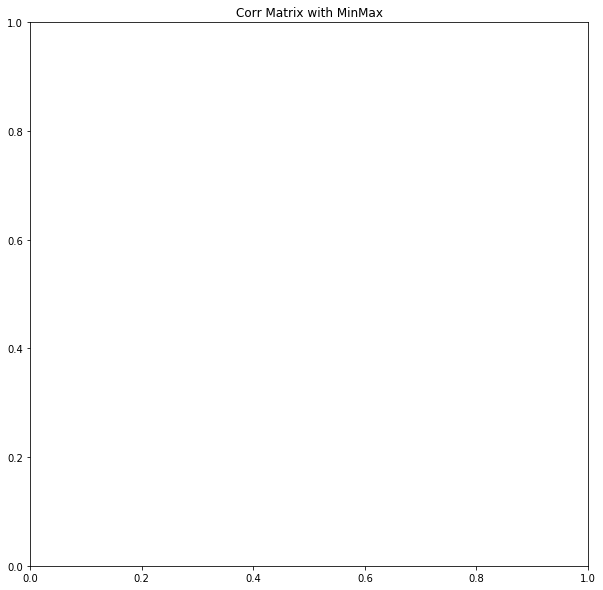

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Corr Matrix with MinMax')
corrMat = final_df_minmax.corr()
#corrMat.to_csv(ntype+'_corr.csv')
corrplot(corrMat)
#plt.show()

In [50]:
def summarise(df)
    s = df.describe()
    indx = list(s.index)
    indx.append('var')
    s = s.append(final_df.var(), ignore_index=True)
    s.index = indx
    

In [54]:
s

,Disc,R3,QFact,CosPhs,RMSFreq,DiscDip,RespFreq,ThinBind,Structure,PhsResp,RelAmpChng,Azm,Dip,InsFreq,AvgFreq,RefStr,InsBand,AMP,AppPol,InsPhs
count,1.108371e+06,1.167394e+06,1.167508e+06,1.148120e+06,1.135469e+06,1.102902e+06,1.167383e+06,1.112607e+06,1.167509e+06,1.167270e+06,1.133729e+06,1.167251e+06,1.167508e+06,1.057716e+06,1.167508e+06,1.065493e+06,1.139111e+06,1.055029e+06,1.162297e+06,1.167508e+06
mean,6.782205e-01,1.362648e+01,2.112155e+00,5.725059e-01,9.584558e+00,2.657028e+00,9.631803e+00,-2.429808e-02,5.547153e+03,-2.523130e+01,-7.076299e-01,-1.373283e+01,1.423493e+00,1.728410e+01,9.105694e+00,7.256156e+03,2.808200e+00,5.202115e+03,5.458731e+03,-1.410746e+01
std,7.789195e-01,1.251008e+01,1.218348e+00,5.684416e-01,3.075335e+00,3.889925e+00,2.130754e+00,5.631305e-01,3.213564e+02,8.492936e+01,2.747436e+00,9.805852e+01,1.782656e+00,6.929490e+00,3.087576e+00,4.825082e+03,1.755001e+00,3.601803e+03,1.406610e+04,6.223312e+01
min,3.923400e-03,-2.982238e+01,-5.685000e-03,-9.999998e-01,1.053520e-02,3.942800e-03,4.110600e-03,-2.999954e+00,4.807036e+03,-1.799994e+02,-9.999895e+00,-1.800000e+02,-3.921600e-03,2.000019e+00,-3.667620e-02,2.183628e-01,9.713120e-02,4.339091e-01,-3.999132e+04,-1.803405e+02
25%,1.483424e-01,1.040163e+01,1.162048e+00,4.096130e-01,7.594388e+00,2.925706e-01,8.167640e+00,-1.592479e-01,5.319908e+03,-8.593543e+01,-2.160314e+00,-9.846180e+01,4.746828e-01,1.266249e+01,7.063092e+00,3.467198e+03,1.654953e+00,2.304234e+03,-5.404852e+03,-4.519255e+01
50%,3.725204e-01,1.674581e+01,1.965852e+00,8.455486e-01,9.706492e+00,9.567385e-01,9.781792e+00,2.178730e-02,5.521402e+03,-3.158039e+01,-7.297758e-01,-3.327271e+01,8.592024e-01,1.684970e+01,9.314502e+00,6.462613e+03,2.283200e+00,4.491577e+03,5.904860e+03,-1.511901e+01
75%,9.032485e-01,2.095315e+01,2.864823e+00,9.688151e-01,1.142876e+01,3.180052e+00,1.114266e+01,1.616576e-01,5.695514e+03,1.883336e+01,5.644456e-01,7.659314e+01,1.571430e+00,2.132028e+01,1.112427e+01,1.015500e+04,3.421589e+00,7.451114e+03,1.225123e+04,1.128980e+01
max,3.999934e+00,4.491322e+01,5.027242e+00,1.000000e+00,1.999999e+01,1.999980e+01,1.980865e+01,2.999866e+00,6.677058e+03,1.799987e+02,9.999344e+00,1.799990e+02,1.004871e+01,3.999977e+01,2.805530e+01,2.199996e+04,9.999999e+00,1.599961e+04,5.999787e+04,1.803097e+02
var,6.067156e-01,1.565022e+02,1.484371e+00,3.231258e-01,9.457682e+00,1.513151e+01,4.540113e+00,3.171160e-01,1.032699e+05,7.212996e+03,7.548405e+00,9.615474e+03,3.177861e+00,4.801784e+01,9.533123e+00,2.328141e+07,3.080028e+00,1.297299e+07,1.978551e+08,3.872961e+03


In [16]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )